<a href="https://colab.research.google.com/github/SAMMOSES26/Assesment-1/blob/main/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **required libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **dataset**

In [74]:
df=pd.read_csv("train.csv")

In [75]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


# **preprocessing data**

In [76]:
df.shape

(45211, 11)

In [77]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [78]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [79]:
df=df.drop_duplicates()

In [80]:
df.shape

(45205, 11)

In [81]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [82]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

mode imputation for job

In [83]:
# imputed unknown values with mode

mode_job = df['job'].mode()[0]
df['job']=df['job'].replace("unknown",mode_job)

In [84]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [85]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [86]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

mode imputation for education_qual

In [87]:
#mode imputing 

mode_education_qual=df['education_qual'].mode()[0]
df['education_qual']=df['education_qual'].replace("unknown",mode_education_qual)

In [88]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [89]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

there are lot unknown values so we are not going to impute them we'r going to consider that as a seprate column

In [90]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['mon'].value_counts()

In [ ]:
df['dur'].value_counts()

In [ ]:
df['num_calls'].value_counts()

In [94]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

here also we not imputing . lots of unknown values . so we are going to consider unknown values as type here

**outlier**

In [95]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [96]:
iqr=df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_threshold=df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['age'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(70.5, 10.5)

In [97]:
iqr=df['day'].quantile(0.75) - df['day'].quantile(0.25)
upper_threshold=df['day'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['day'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(40.5, -11.5)

In [98]:
iqr=df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold=df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['dur'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(643.0, -221.0)

In [99]:
df.dur=df.dur.clip(643.0, -221.0)

In [100]:
iqr=df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold=df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [101]:
df.num_calls=df.num_calls.clip(6.0, -2.0)

In [102]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [103]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# count = df['prev_outcome'].value_counts()['unknown']
# print(count)

In [24]:
df['target']=df['y'].map({'yes':1,'no':0})

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [26]:
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

In [27]:
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [28]:
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: target, dtype: float64

In [29]:
df.groupby('call_type')['target'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [30]:
df.groupby('mon')['target'].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [31]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


# **EDA**

distribution of feature plot

In [41]:
# df_j =pd.DataFrame(df.job.value_counts()).sort_values("job",ascending=False).reset_index()
# df_j.rename(columns={"index":"job","job":"count"}, inplace=True)
# bar=sns.barplot(x=df_j["job"],y=df_j["count"],data=df_j)
# bar.tick_params(axis="x" ,rotation=90)

<AxesSubplot:ylabel='job'>

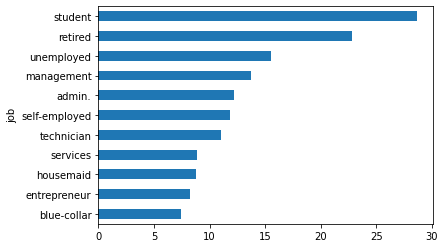

In [42]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='marital'>

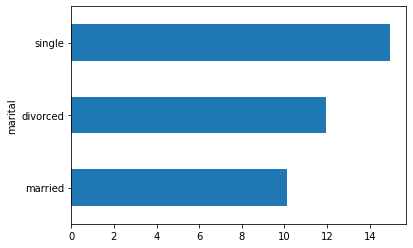

In [43]:
(df.groupby("marital")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='education_qual'>

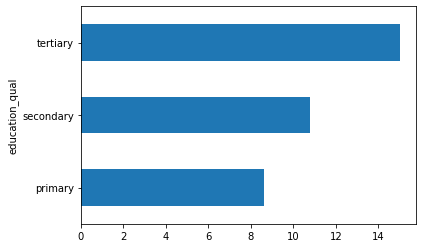

In [44]:
(df.groupby("education_qual")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='call_type'>

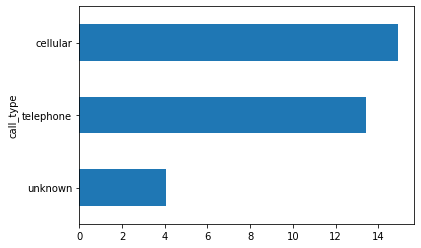

In [45]:
(df.groupby("call_type")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='mon'>

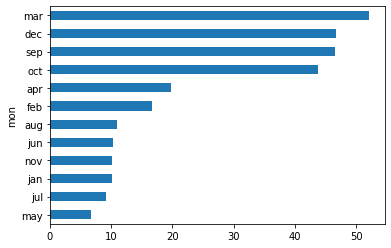

In [46]:
(df.groupby("mon")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='prev_outcome'>

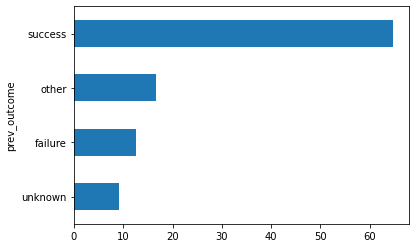

In [47]:
(df.groupby("prev_outcome")['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='day'>

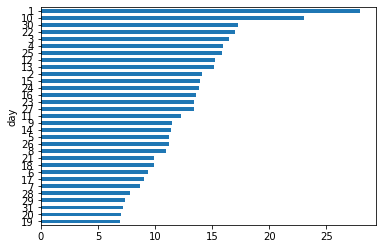

In [48]:
(df.groupby("day")['target'].mean()*100).sort_values().plot(kind="barh")

we do this above plotting for 3 reasons 

1. to find is this feature important
2. is there order in data
3. what sort of encoding to do

plot between continus feature vs target

<AxesSubplot:xlabel='y', ylabel='age'>

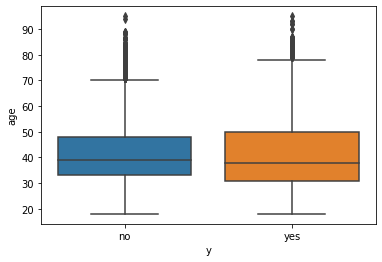

In [49]:
sns.boxplot(x="y", y="age", data=df)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

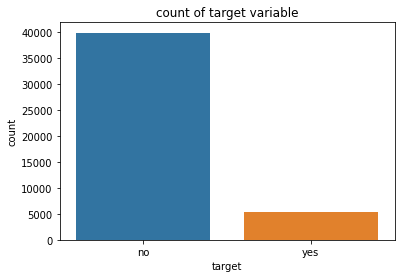

In [50]:
sns.countplot(x=df.y,data=df)
plt.xlabel("target")
plt.title("count of target variable")
plt.plot

# **Encoding**

In [51]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


In [52]:
#job encoding
df.job=df.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

In [53]:
#marital encoding
df.marital=df.marital.map({'married':0,'divorced':1,'single':2})

In [54]:
#education_qual encoding
df.education_qual=df.education_qual.map({'primary':0,'secondary':1,'tertiary':2})

In [55]:
#call_type encoding
df.call_type=df.call_type.map({'unknown':0,'telephone':1,'cellular':2})

In [56]:
#mon encoding
df.mon=df.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [57]:
#prev_outcome encoding
df.prev_outcome=df.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

In [58]:
#encoded y (target column) to target so dropped y
df=df.drop(['y'], axis=1)

# **balancing**

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

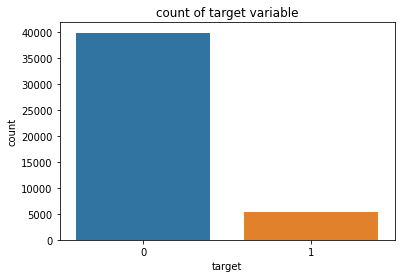

In [59]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

sns.countplot(x=df.target,data=df)
plt.xlabel("target")
plt.title("count of target variable")
plt.plot

data is imbalance because more than 70 % data belongs to one class

In [60]:
X = df.loc[:, df.columns != 'target']
y = df['target']

In [61]:
#balancing data
from imblearn.combine import SMOTEENN

# plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X,y)

Class 0: 30352
Class 1: 38465
Proportion of class 0 is  44.11 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

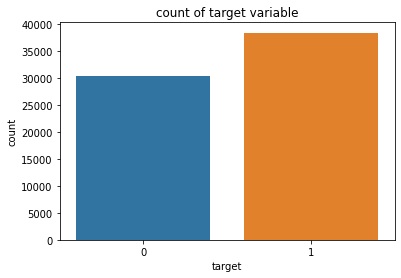

In [62]:
target_count = y_smt.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

sns.countplot(x=y_smt)
plt.xlabel("target")
plt.title("count of target variable")
plt.plot

# **splitting**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_smt,y_smt, test_size=0.2)

# **scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# **logistic** **regression**

In [65]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


In [66]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
logistic_auroc = roc_auc_score(y_test, y_pred)
print("AUROC score:", logistic_auroc)

AUROC score: 0.8755081891391695


# **knn**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = "roc_auc")))

K value  :  1  train score :  1.0  cv score :  0.9334393997495161
K value  :  2  train score :  0.9804370334041742  cv score :  0.952812161960804
K value  :  3  train score :  0.9631446061068425  cv score :  0.9609824881171598
K value  :  4  train score :  0.9580404337638276  cv score :  0.9652844039012644
K value  :  5  train score :  0.9492307412856702  cv score :  0.9671880276811231
K value  :  6  train score :  0.9464334368699253  cv score :  0.9684865957546297
K value  :  7  train score :  0.9422193159319201  cv score :  0.9690308427971595
K value  :  8  train score :  0.9401485840916934  cv score :  0.9694127483670218
K value  :  9  train score :  0.9360252847256281  cv score :  0.9699541578919867
K value  :  10  train score :  0.9343178391731604  cv score :  0.9700502090558285
K value  :  20  train score :  0.9226926779648702  cv score :  0.9688440750099169


In [70]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9235687300203429

# **decision tree**

In [71]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,50]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

ImportError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) 

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

**auroc score**

In [ ]:
dt_auroc = roc_auc_score(y_test, y_pred)
print("dt_auroc: ",dt_auroc)